In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/bike.csv')

In [63]:
# 提取年份、月份、日期、星期几
df['datetime'] = pd.to_datetime(df['dteday'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday

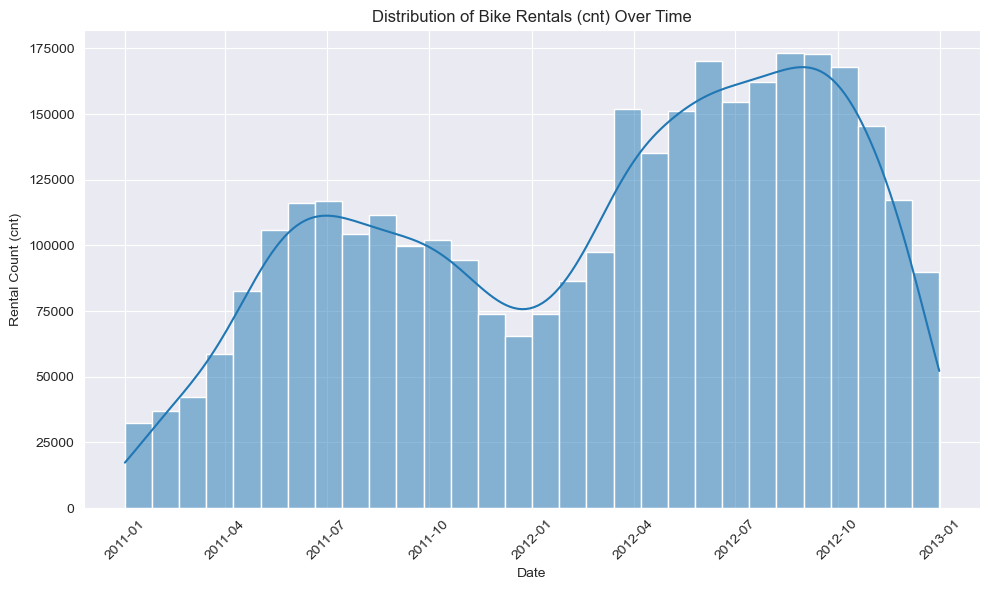

In [64]:
# 转换为日期类型
df['dteday'] = pd.to_datetime(df['dteday'])

plt.figure(figsize=(10,6))
sns.histplot(df, x='dteday', weights=df['cnt'], bins=30, kde=True)

plt.title('Distribution of Bike Rentals (cnt) Over Time')
plt.xlabel('Date')
plt.ylabel('Rental Count (cnt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

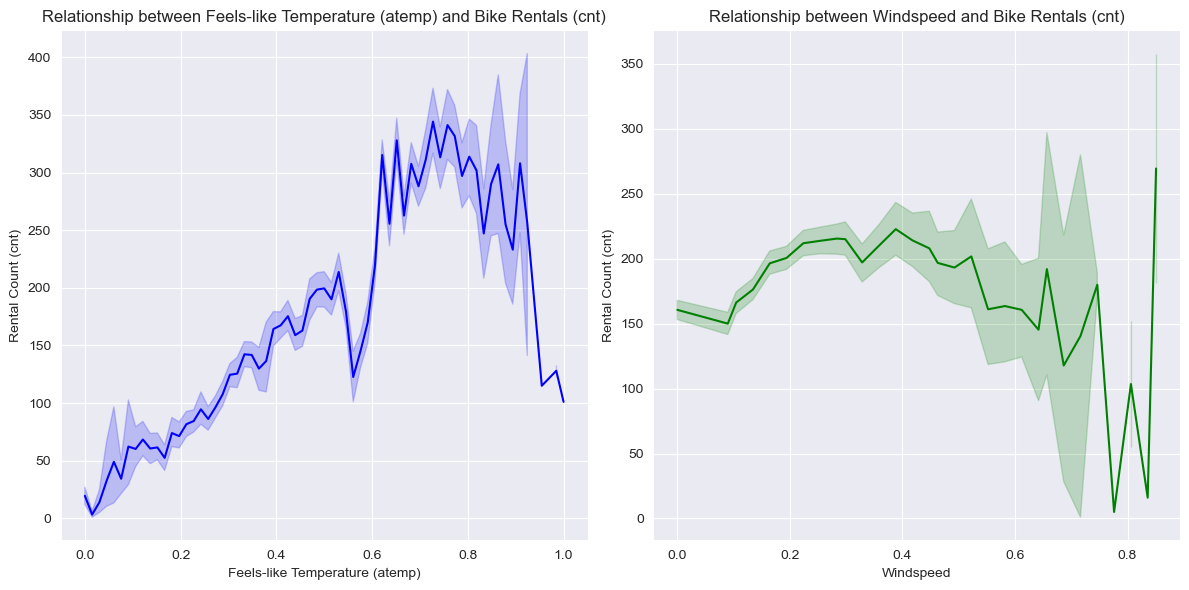

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn

# 假设数据集已经加载到 df 中
plt.figure(figsize=(12, 6))

# atemp 和 cnt 的关系
plt.subplot(1, 2, 1)  # 1 行 2 列，第一个图
sns.lineplot(x='atemp', y='cnt', data=df, color='blue')
plt.title('Relationship between Feels-like Temperature (atemp) and Bike Rentals (cnt)')
plt.xlabel('Feels-like Temperature (atemp)')
plt.ylabel('Rental Count (cnt)')

# windspeed 和 cnt 的关系
plt.subplot(1, 2, 2)  # 1 行 2 列，第二个图
sns.lineplot(x='windspeed', y='cnt', data=df, color='green')
plt.title('Relationship between Windspeed and Bike Rentals (cnt)')
plt.xlabel('Windspeed')
plt.ylabel('Rental Count (cnt)')


plt.tight_layout()
plt.show()

In [66]:
# One-hot 编码
categorical_cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 构造滞后特征
df_encoded['lag1'] = df_encoded['cnt'].shift(1)
df_encoded['lag2'] = df_encoded['cnt'].shift(2)
df_encoded = df_encoded.dropna()

feature_cols = [col for col in df_encoded.columns if col not in ['cnt', 'dteday', 'datetime', 'instant', 'day']]
X = df_encoded[feature_cols]
y = df_encoded['cnt']

# 划分
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练与评估
# 1.线性回归
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# 初始化模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 拟合训练数据
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)
# 评估
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}\n")
print("Random Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

Linear Regression:
MSE: 3565.107908470584
R²: 0.8848323418898291

Random Forest Regressor:
MSE: 1192.1726931242808
R² Score: 0.9614879154698799


Sorted Feature Importances:
lag1: 0.7584050533022068
lag2: 0.04119201656406926
hr_17: 0.03474200454831991
hr_8: 0.030089747738596826
hr_9: 0.026792775557440418
hr_7: 0.021241960278918573
workingday: 0.021049316837192127
hr_16: 0.009350067544051887
hum: 0.00487952976675049
hr_10: 0.0039840405014567965
temp: 0.0039046588367183466
hr_12: 0.003803269529809132
atemp: 0.003419988254846552
hr_19: 0.0029081514719600057
hr_18: 0.002853725024839863
windspeed: 0.0027982663574979325
hr_11: 0.0027699413296985997
month: 0.0025420958992269692
year: 0.0025313693919084544
yr: 0.0022519879020496906
hr_15: 0.002243820860138657
weekday_4: 0.0018535855501237654
hr_6: 0.0016392929071693725
weathersit_3: 0.0015902312172696987
hr_20: 0.001447186054474214
hr_14: 0.0009530209991458988
hr_13: 0.0007221665259277728
weekday_5: 0.0005687823217137083
hr_23: 0.0005350140631890508
weathersit_2: 0.00046600228654761715
season_4: 0.00042620237524280713
mnth_10: 0.00042292425091974346
weekday_1: 0.00040871993624609415
wee

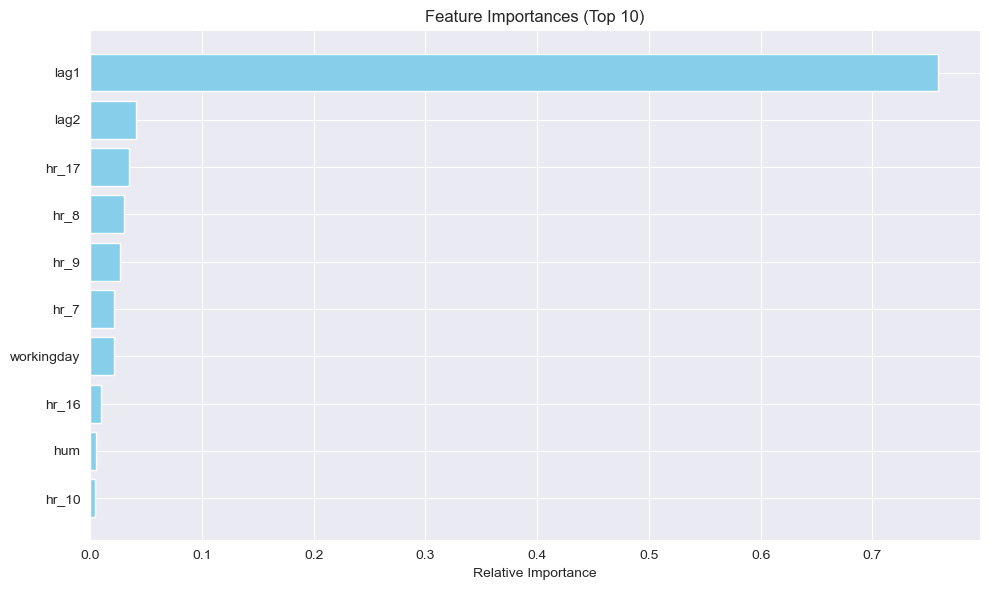

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# 获取特征的重要性
importances = rf_model.feature_importances_

# 对特征的重要性进行排序
indices = np.argsort(importances)[::-1]


# print("Sorted Feature Importances:")
# for i in indices:
#    print(f"{X_train.columns[i]}: {importances[i]}")


top_indices = indices[:10]  # Top 10
reversed_indices = top_indices[::-1]
# 绘制前10个特征的重要性图
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Top 10)")
plt.barh(range(len(reversed_indices)), importances[reversed_indices], color='skyblue', align='center')
plt.yticks(range(len(reversed_indices)), [X_train.columns[i] for i in reversed_indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

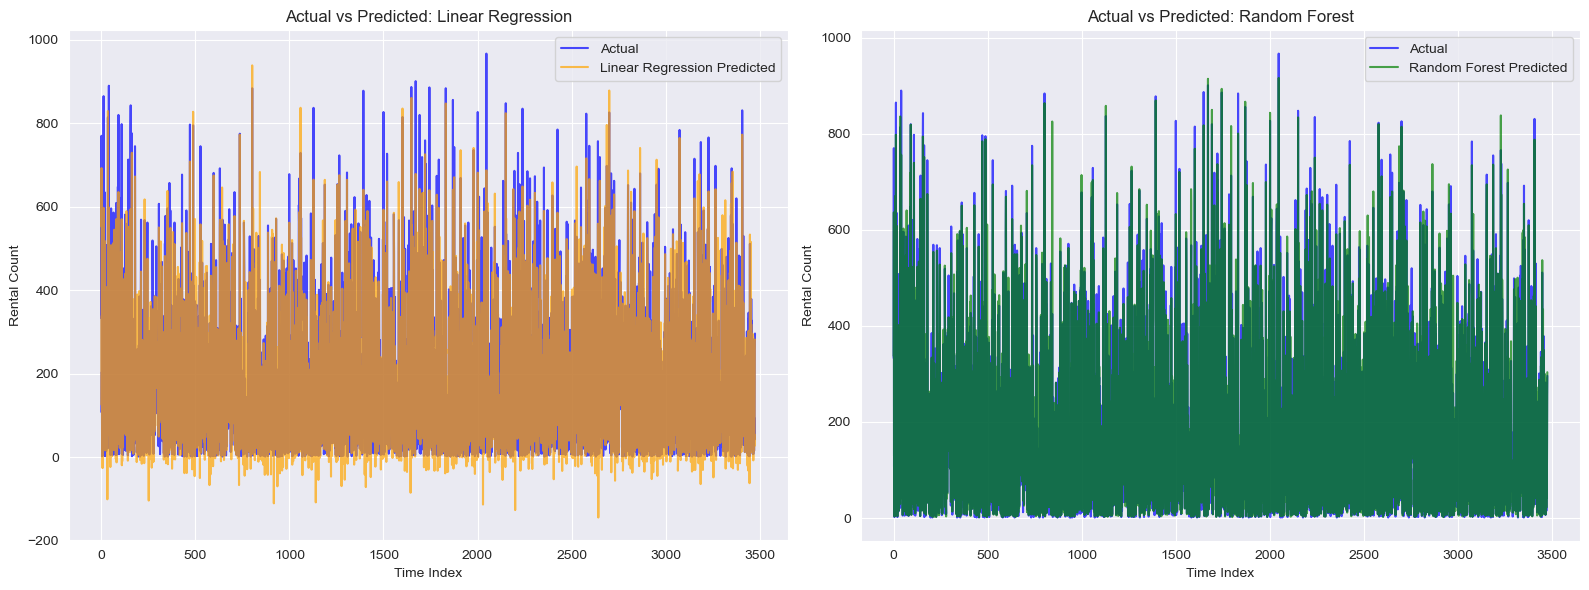

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# 左侧图：Linear Regression
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Linear Regression Predicted', color='orange', alpha=0.7)
plt.title('Actual vs Predicted: Linear Regression')
plt.xlabel('Time Index')
plt.ylabel('Rental Count')
plt.legend()
plt.grid(True)

# 右侧图：Random Forest
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest Predicted', color='green', alpha=0.7)
plt.title('Actual vs Predicted: Random Forest')
plt.xlabel('Time Index')
plt.ylabel('Rental Count')
plt.legend()
plt.grid(True)

# 自动调整子图间距并显示
plt.tight_layout()
plt.show()

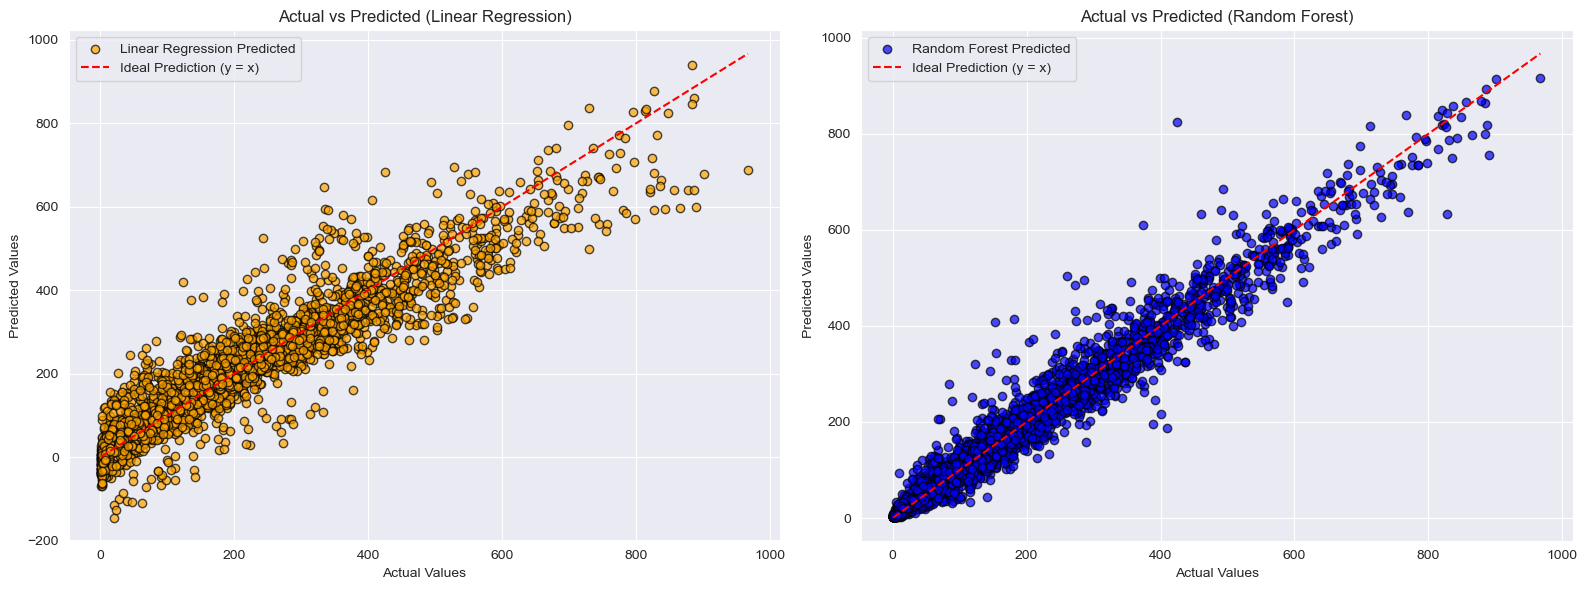

In [70]:
import matplotlib.pyplot as plt

# Create a 1x2 grid for the plots (1 row, 2 columns)
plt.figure(figsize=(16, 6))

# First plot: Linear Regression (on the left)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='orange', edgecolors='k', label="Linear Regression Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction (y = x)")
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Second plot: Random Forest (on the right)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue', edgecolors='k', label="Random Forest Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction (y = x)")
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

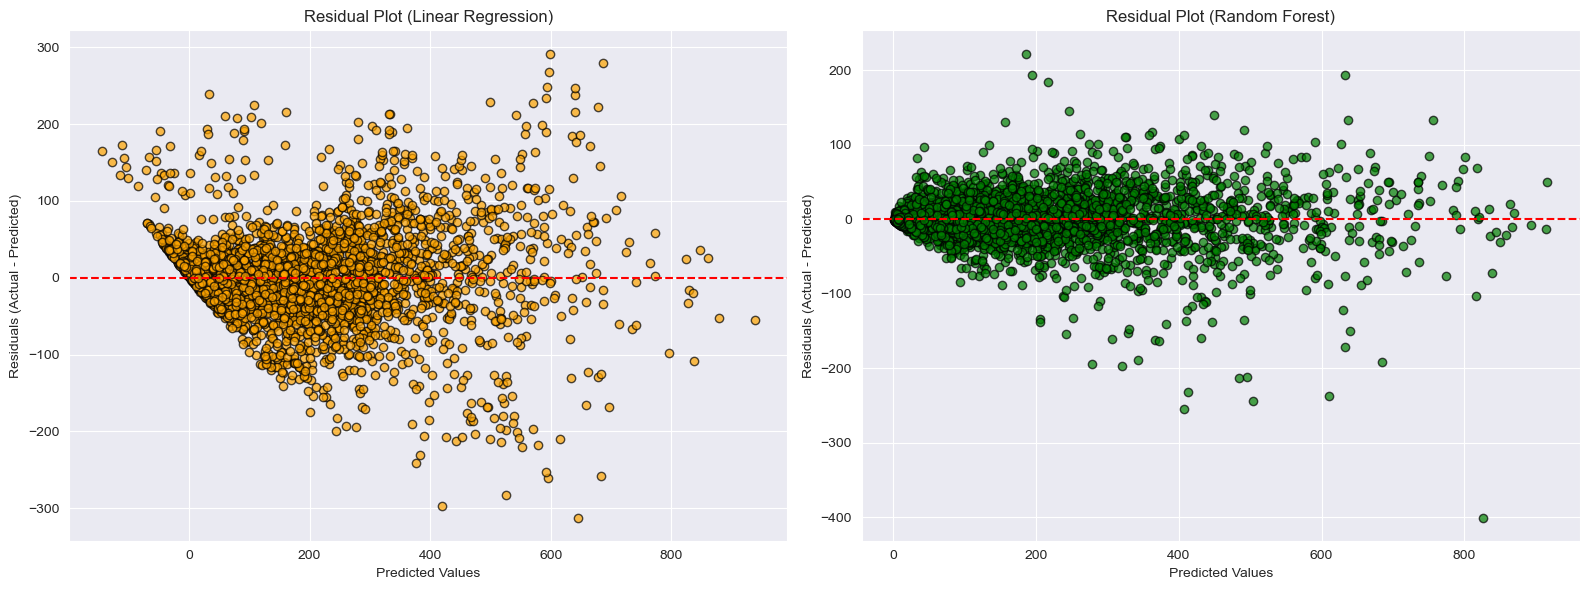

In [78]:
plt.figure(figsize=(16, 6))

# Linear Regression residuals（左侧）
plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred
plt.scatter(y_pred, residuals_lr, alpha=0.7, color='orange', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Random Forest residuals（右侧）
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.7, color='green', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
